In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
#データ作成
df = pd.DataFrame(
            data = {"image":[1,1,1,0,0,0],
                    "like":[4,6,3,0,2,2]}
           )

res_image = df['image'].values.reshape(-1,1) #変形

#モデル作成
clf = linear_model.PoissonRegressor(
                        alpha=0,  #ペナルティ(0はペナなし)　#L2正則化
                        #fit_intercept=False,  #切片
                      )
result = clf.fit(res_image,df['like'])

In [3]:
inte = result.intercept_ #切片
coef = result.coef_ #偏回帰係数
print(inte,coef)

#予測
X = res_image
y = df['like']
y_hat = clf.predict(X)#期待値
print(y_hat) 

0.2876828190295626 [1.17865411]
[4.33333274 4.33333274 4.33333274 1.33333433 1.33333433 1.33333433]


In [4]:
#画像があることでどれだけLike数が増えるか？
clf.predict([[1]]) - clf.predict([[0]]) #True - False

array([2.99999841])

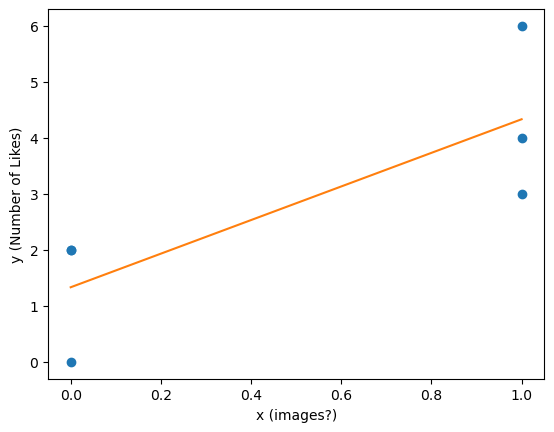

In [5]:
plt.plot(df['image'], df['like'],"o") #標本値をプロット
plt.plot(df['image'], y_hat) #回帰直線をプロット
plt.xlabel('x (images?)'), plt.ylabel('y (Number of Likes)')

plt.show() #プロットの表示

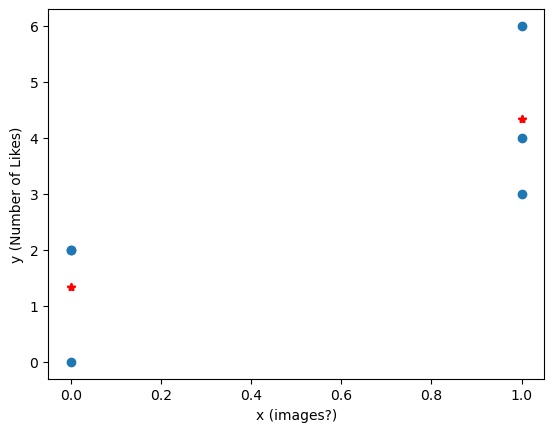

In [6]:
plt.plot(X, y, "o") #標本値をプロット
plt.plot(X, y_hat, "*", color="r") #回帰直線をプロット
plt.xlabel('x (images?)'), plt.ylabel('y (Number of Likes)') #プロットの表示
plt.show()